<div style="text-align: center; padding: 20px; border-radius: 15px; background: linear-gradient(135deg, #e0f7fa, #b2ebf2); box-shadow: 0 4px 10px rgba(0,0,0,0.1);">
  <h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #00796b; font-size: 32px; margin-bottom: 10px;">
    Atelier : Prédiction floue du risque de panne d’une machine industrielle
  </h1>
  <h2 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #004d40; font-size: 20px;">
     Oumaima el alami IID-3
  </h2>
</div>


# **Objectif :**

Concevoir un système intelligent combinant logique floue et Machine Learning pour estimer le risque de panne d’une machine à partir d’indicateurs incertains (température, vibrations, âge).

**Vous apprendrez à**
- Construire un système d’inférence floue complet.  
- Générer un jeu de données synthétique à partir du modèle flou.  
- Entraîner un modèle ML pour généraliser la prédiction.  
- Comparer les deux approches (floue vs ML).


# **Contexte :**
Les ingénieurs de maintenance veulent estimer le risque de panne d’une machine. 
Cependant, les indicateurs collectés sont souvent imprécis : 

- “température élevée”, “vibrations légères”, “machine récente”… 

L'objectif est de créer un modèle capable de gérer cette incertitude grâce à la logique floue, puis d’entraîner un modèle de Machine Learning pour automatiser la prédiction.

In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **Modélisation floue :**


**1. Définition des variables floues**

In [17]:
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'température')
vibration = ctrl.Antecedent(np.arange(0, 11, 1), 'vibration')
age = ctrl.Antecedent(np.arange(0, 21, 1), 'âge')
risque = ctrl.Consequent(np.arange(0, 11, 1), 'risque')

**2. Fonctions d’appartenance**

In [18]:
temperature['basse'] = fuzz.trimf(temperature.universe, [0, 0, 40])
temperature['normale'] = fuzz.trimf(temperature.universe, [30, 50, 70])
temperature['élevée'] = fuzz.trimf(temperature.universe, [60, 100, 100])

vibration['faible'] = fuzz.trimf(vibration.universe, [0, 0, 4])
vibration['moyenne'] = fuzz.trimf(vibration.universe, [2, 5, 8])
vibration['forte'] = fuzz.trimf(vibration.universe, [6, 10, 10])

age['neuf'] = fuzz.trimf(age.universe, [0, 0, 7])
age['moyen'] = fuzz.trimf(age.universe, [5, 10, 15])
age['ancien'] = fuzz.trimf(age.universe, [12, 20, 20])

risque['faible'] = fuzz.trimf(risque.universe, [0, 0, 4])
risque['moyen'] = fuzz.trimf(risque.universe, [2, 5, 8])
risque['élevé'] = fuzz.trimf(risque.universe, [6, 10, 10])

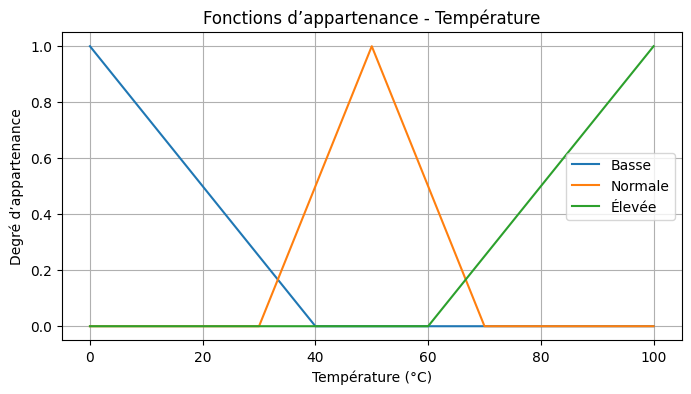

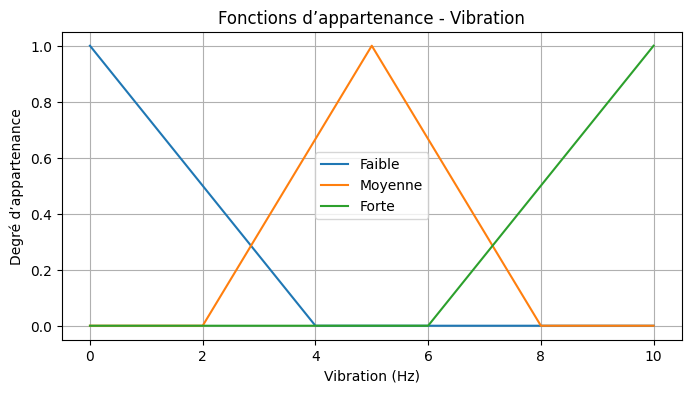

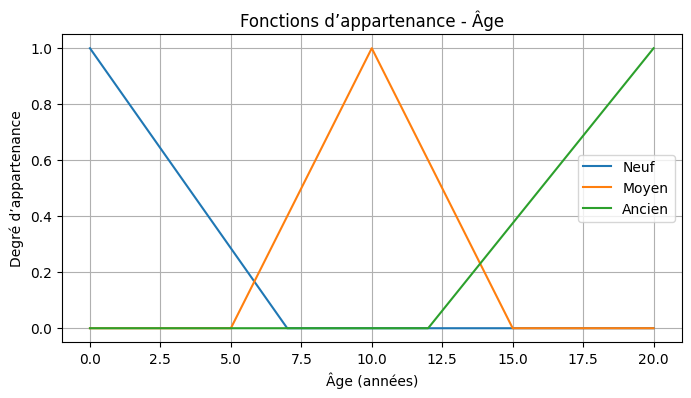

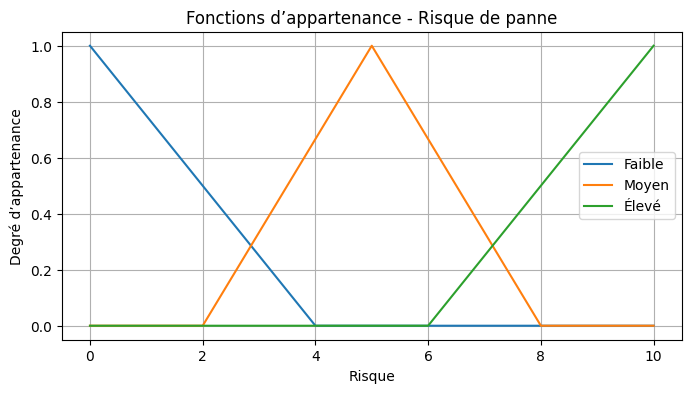

In [19]:
# --- Température ---
plt.figure(figsize=(8, 4))
plt.plot(temperature.universe, temperature['basse'].mf, label='Basse')
plt.plot(temperature.universe, temperature['normale'].mf, label='Normale')
plt.plot(temperature.universe, temperature['élevée'].mf, label='Élevée')
plt.title('Fonctions d’appartenance - Température')
plt.xlabel('Température (°C)')
plt.ylabel('Degré d’appartenance')
plt.legend()
plt.grid(True)
plt.show()

# --- Vibration ---
plt.figure(figsize=(8, 4))
plt.plot(vibration.universe, vibration['faible'].mf, label='Faible')
plt.plot(vibration.universe, vibration['moyenne'].mf, label='Moyenne')
plt.plot(vibration.universe, vibration['forte'].mf, label='Forte')
plt.title('Fonctions d’appartenance - Vibration')
plt.xlabel('Vibration (Hz)')
plt.ylabel('Degré d’appartenance')
plt.legend()
plt.grid(True)
plt.show()

# --- Âge ---
plt.figure(figsize=(8, 4))
plt.plot(age.universe, age['neuf'].mf, label='Neuf')
plt.plot(age.universe, age['moyen'].mf, label='Moyen')
plt.plot(age.universe, age['ancien'].mf, label='Ancien')
plt.title('Fonctions d’appartenance - Âge')
plt.xlabel('Âge (années)')
plt.ylabel('Degré d’appartenance')
plt.legend()
plt.grid(True)
plt.show()

# --- Risque ---
plt.figure(figsize=(8, 4))
plt.plot(risque.universe, risque['faible'].mf, label='Faible')
plt.plot(risque.universe, risque['moyen'].mf, label='Moyen')
plt.plot(risque.universe, risque['élevé'].mf, label='Élevé')
plt.title('Fonctions d’appartenance - Risque de panne')
plt.xlabel('Risque')
plt.ylabel('Degré d’appartenance')
plt.legend()
plt.grid(True)
plt.show()


**3. Règles floues**

In [20]:
rule1 = ctrl.Rule(temperature['élevée'] | vibration['forte'], risque['élevé'])
rule2 = ctrl.Rule(age['ancien'] & vibration['moyenne'], risque['moyen'])
rule3 = ctrl.Rule(temperature['basse'] & vibration['faible'] & age['neuf'], risque['faible'])
rule4 = ctrl.Rule(temperature['normale'] & age['moyen'], risque['moyen'])


**4. Contrôleur flou**

In [21]:
risque_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
risque_sim = ctrl.ControlSystemSimulation(risque_ctrl)

**5. Exemple de simulation**

In [22]:
risque_sim.input['température'] = 70 
risque_sim.input['vibration'] = 8
risque_sim.input['âge'] = 15
risque_sim.compute()
print(f"Risque flou simulé : {risque_sim.output['risque']:.2f}")

Risque flou simulé : 8.44


**6. Génération du datase**

In [23]:
np.random.seed(42)
N = 2000
data = np.empty((N, 3))
data[:,0] = np.random.rand(N) * 100   # température
data[:,1] = np.random.rand(N) * 10    # vibration
data[:,2] = np.random.rand(N) * 20    # âge

labels = np.empty(N)
labels[:] = np.nan

for i, (t, v, a) in enumerate(data):
    sim = ctrl.ControlSystemSimulation(risque_ctrl)  
    sim.input['température'] = float(t) 
    sim.input['vibration'] = float(v) 
    sim.input['âge'] = float(a) 
    try:
        sim.compute()
        val = sim.output.get('risque', np.nan)
    except Exception as e:
        val = np.nan
    labels[i] = val


In [24]:
n_nan = np.isnan(labels).sum()
print(f"Nombre de cas sans sortie floue (NaN) : {n_nan} / {N}")
# remplacer NaN par la moyenne des valeurs non-NaN si possible, sinon 0.0
if n_nan > 0:
    mean_val = np.nanmean(labels)
    if np.isnan(mean_val):
        mean_val = 0.0
    labels = np.nan_to_num(labels, nan=mean_val)
    print(f"Remplacement des NaN par la moyenne = {mean_val:.4f}")


Nombre de cas sans sortie floue (NaN) : 243 / 2000
Remplacement des NaN par la moyenne = 6.7635


**7. Entraînement Machine Learning**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**8. Évaluation**

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\n Erreur quadratique moyenne (MSE) : {mse:.4f}")
print(f" Coefficient R² : {r2:.4f}") 


 Erreur quadratique moyenne (MSE) : 0.0703
 Coefficient R² : 0.9796


**9. Visualisation**

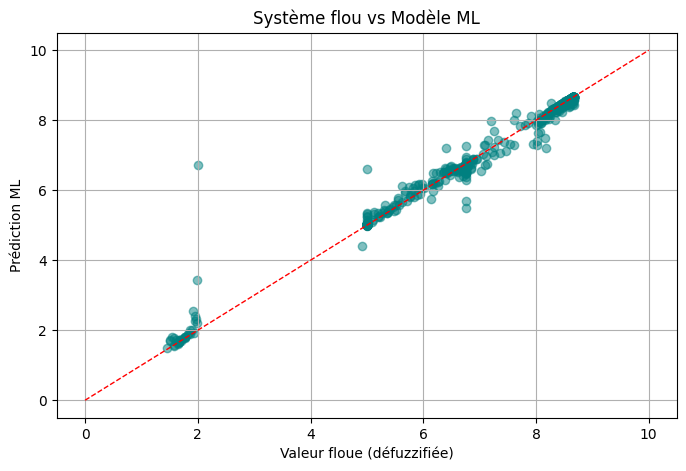

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5,color='teal')
plt.plot([0,10],[0,10], linestyle='--', linewidth=1,color='red')  # ligne idéale
plt.xlabel("Valeur floue (défuzzifiée)")
plt.ylabel("Prédiction ML")
plt.title("Système flou vs Modèle ML")
plt.grid(True)
plt.show()

les points sont proches de la ligne rouge cqui montre que le modèle ML apprend bien à reproduire la logique floue.

# **Sauvegarde du modèle entraîné**

In [ ]:
# save the model 
import joblib
joblib.dump(model, 'fuzzy_risk_model.pkl')

['fuzzy_risk_model.pkl']

# **Charger le modèle et le tester sur une nouvelle donnée**

**mêmes valeurs que l'exemple flou**

In [ ]:
model_loaded = joblib.load("fuzzy_risk_model.pkl")
nouvelle_donnee = np.array([[70, 8, 15]])  
prediction_ml = model_loaded.predict(nouvelle_donnee)
print(f"Risque prédit par le modèle ML pour  {prediction_ml[0]:.2f}")

Risque prédit par le modèle ML pour  8.41


# **Interprétation : Fuzzy Logic vs Machine Learning**

| **Aspect**              | **Logique floue**                                                          | **Machine Learning**                                                |
| ----------------------- | ---------------------------------------------------------------------------- | --------------------------------------------------------------------- |
| **Principe**            | Basée sur des règles expertes définies à la main.                            | Apprend automatiquement à partir des données.                         |
| **Transparence**        | Très élevée : on peut lire les règles “si-alors”.                            | Basse : les modèles sont souvent des “boîtes noires”.                 |
| **Interprétabilité**    | Excellente : chaque décision est expliquée par une règle.                    | Faible : difficile de savoir pourquoi le modèle prédit une valeur.    |
| **Précision**           | Limitée aux règles formulées ; pas d’apprentissage automatique.              | Élevée, si bien entraîné avec assez de données.                       |
| **Généralisation**      | Mauvaise hors du domaine couvert par les règles.                             | Très bonne sur de nouvelles données similaires.                       |
| **Données nécessaires** | Peu ou pas (expertise humaine suffit).                                       | Beaucoup de données étiquetées nécessaires.                           |
| **Maintenance**         | Nécessite des experts pour ajuster les règles.                               | Nécessite de réentraîner le modèle quand les données changent.        |
| **Cas d’usage idéal**   | Quand les règles métier sont connues (ex : diagnostic, contrôle industriel). | Quand on dispose de données massives et qu’on cherche la performance. |
